# World Weather (100 city)

## Understanding the Problem
### Goal and key question.

* **What is the temperature difference between the cities?**
* **How much has the average annual temperature of the continents changed in 40 years?**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
weather_1980 = pd.read_csv("C:/Users/mamma/OneDrive/Masaüstü/Data/hourly_data_combined_1980_to_1989.csv")

In [147]:
weather_1980.head()

,city,date,temperature,humidity,apparent_temperature,year,month,day,continent
0,Abu Dhabi,1980-01-01 00:00:00,17.5,72.0,14.8,1980,1,1,Asia
1,Abu Dhabi,1980-01-01 01:00:00,17.4,72.0,14.7,1980,1,1,Asia
2,Abu Dhabi,1980-01-01 02:00:00,17.3,71.0,14.8,1980,1,1,Asia
3,Abu Dhabi,1980-01-01 03:00:00,17.3,71.0,14.8,1980,1,1,Asia
4,Abu Dhabi,1980-01-01 04:00:00,17.7,69.0,15.3,1980,1,1,Asia


In [141]:
weather_1980.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8767200 entries, 0 to 8767199
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   city                  object        
 1   date                  datetime64[ns]
 2   temperature           float64       
 3   humidity              float64       
 4   apparent_temperature  float64       
 5   year                  int32         
 6   month                 int32         
 7   day                   int32         
 8   continent             object        
dtypes: datetime64[ns](1), float64(3), int32(3), object(2)
memory usage: 501.7+ MB


In [12]:
weather_2020 = pd.read_csv("C:/Users/mamma/OneDrive/Masaüstü/Data/hourly_data_combined_2020_to_2024.csv")

In [143]:
weather_2020.head()

,city,date,temperature,humidity,apparent_temperature,year,month,day,continent
0,Abu Dhabi,2020-01-01 00:00:00,18.8,92.0,19.7,2020,1,1,Asia
1,Abu Dhabi,2020-01-01 01:00:00,17.9,92.0,18.1,2020,1,1,Asia
2,Abu Dhabi,2020-01-01 02:00:00,17.6,94.0,17.8,2020,1,1,Asia
3,Abu Dhabi,2020-01-01 03:00:00,17.1,93.0,17.2,2020,1,1,Asia
4,Abu Dhabi,2020-01-01 04:00:00,17.8,91.0,18.0,2020,1,1,Asia


In [145]:
weather_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228800 entries, 0 to 4228799
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   city                  object        
 1   date                  datetime64[ns]
 2   temperature           float64       
 3   humidity              float64       
 4   apparent_temperature  float64       
 5   year                  int32         
 6   month                 int32         
 7   day                   int32         
 8   continent             object        
dtypes: datetime64[ns](1), float64(3), int32(3), object(2)
memory usage: 242.0+ MB


## Data Cleaning and Data Manipulation

As you can see below, the data does not have null values. In addition, at this stage, I deleted unnecessary columns, added new columns for better analysis, and changed the names and values ​​of some existing columns to make them more understandable and better.

### Deleting columns, adding new columns, changing column names, and changing values ​​in some columns.

In [25]:
weather_1980 = weather_1980.drop(columns=['dew_point_2m','precipitation','rain','snowfall','snow_depth','weather_code', 
                     'pressure_msl','surface_pressure','cloud_cover','cloud_cover_low','cloud_cover_mid','diffuse_radiation',
                     'cloud_cover_high','et0_fao_evapotranspiration','vapour_pressure_deficit','wind_speed_10m',
                     'wind_speed_100m','direct_radiation','wind_direction_10m','wind_direction_100m','wind_gusts_10m',
                     'soil_temperature_0_to_7cm','soil_temperature_7_to_28cm','shortwave_radiation','soil_temperature_28_to_100cm',
                     'soil_temperature_100_to_255cm','soil_moisture_0_to_7cm','soil_moisture_7_to_28cm',
                     'soil_moisture_28_to_100cm','soil_moisture_100_to_255cm','direct_normal_irradiance','global_tilted_irradiance',
                     'terrestrial_radiation','shortwave_radiation_instant','direct_radiation_instant','diffuse_radiation_instant',
                     'direct_normal_irradiance_instant','global_tilted_irradiance_instant','terrestrial_radiation_instant'])

In [27]:
weather_2020 = weather_2020.drop(columns=['dew_point_2m','precipitation','rain','snowfall','snow_depth','weather_code', 
                     'pressure_msl','surface_pressure','cloud_cover','cloud_cover_low','cloud_cover_mid','diffuse_radiation',
                     'cloud_cover_high','et0_fao_evapotranspiration','vapour_pressure_deficit','wind_speed_10m',
                     'wind_speed_100m','direct_radiation','wind_direction_10m','wind_direction_100m','wind_gusts_10m',
                     'soil_temperature_0_to_7cm','soil_temperature_7_to_28cm','shortwave_radiation','soil_temperature_28_to_100cm',
                     'soil_temperature_100_to_255cm','soil_moisture_0_to_7cm','soil_moisture_7_to_28cm',
                     'soil_moisture_28_to_100cm','soil_moisture_100_to_255cm','direct_normal_irradiance','global_tilted_irradiance',
                     'terrestrial_radiation','shortwave_radiation_instant','direct_radiation_instant','diffuse_radiation_instant',
                     'direct_normal_irradiance_instant','global_tilted_irradiance_instant','terrestrial_radiation_instant'])

In [29]:
weather_1980 = weather_1980.rename(columns={'city_name':'city', 'datetime':'date', 'temperature_2m':'temperature', 'relative_humidity_2m':'humidity'})

In [31]:
weather_2020 = weather_2020.rename(columns={'city_name':'city',  'datetime':'date', 'temperature_2m':'temperature', 'relative_humidity_2m':'humidity'})

In [33]:
weather_1980['date'] = pd.to_datetime(weather_1980['date'])

In [35]:
weather_1980['year'] = weather_1980['date'].dt.year

In [37]:
weather_1980['month'] = weather_1980['date'].dt.month

In [39]:
weather_1980['day'] = weather_1980['date'].dt.day

In [41]:
weather_2020['date'] = pd.to_datetime(weather_2020['date'])

In [43]:
weather_2020['year'] = weather_2020['date'].dt.year

In [45]:
weather_2020['month'] = weather_2020['date'].dt.month

In [47]:
weather_2020['day'] = weather_2020['date'].dt.day

In [49]:
city_continent = {
    'Abu Dhabi': 'Asia','Amsterdam': 'Europe','Athens': 'Europe','Atlanta': 'North America','Auckland': 'Oceania',
    'Austin': 'North America','Bangkok': 'Asia','Barcelona': 'Europe','Beijing': 'Asia','Berlin': 'Europe',
    'Bilbao': 'Europe','Birmingham': 'Europe','Bogota': 'South America','Boston': 'North America','Brisbane': 'Oceania',
    'Brussels': 'Europe','Bucharest': 'Europe','Budapest': 'Europe','Buenos Aires': 'South America','Busan': 'Asia',
    'Calgary': 'North America','Charlotte': 'North America','Chicago': 'North America','City of Baltimore': 'North America',
    'City of London': 'Europe','Cologne': 'Europe','Copenhagen': 'Europe','Dallas': 'North America','Denver': 'North America',
    'Doha': 'Asia','Dubai': 'Asia','Dublin': 'Europe','Dusseldorf': 'Europe','Frankfurt': 'Europe','Glasgow': 'Europe',
    'Gothenburg': 'Europe','Hamburg': 'Europe','Hanoi': 'Asia','Helsinki': 'Europe','Hong Kong': 'Asia','Houston': 'North America',
    'Istanbul': 'Europe','Krakow': 'Europe','Kuwait City': 'Asia','Las Vegas': 'North America','Leeds': 'Europe','Lisbon': 'Europe',
    'Liverpool': 'Europe','Los Angeles': 'North America','Lyon': 'Europe','Madrid': 'Europe','Manchester': 'Europe',
    'Melbourne': 'Oceania','Mexico City': 'North America','Miami': 'North America','Milan': 'Europe','Minneapolis': 'North America',
    'Minsk': 'Europe','Montreal': 'North America','Munich': 'Europe','Muscat': 'Asia','Nagoya': 'Asia','Naples': 'Europe',
    'Nashville': 'North America','New Orleans': 'North America','New York City': 'North America','Orlando': 'North America',
    'Osaka': 'Asia','Oslo': 'Europe','Ottawa': 'North America','Paris': 'Europe','Philadelphia': 'North America',
    'Portland': 'North America','Prague': 'Europe','Rio de Janeiro': 'South America','Riyadh': 'Asia','Rome': 'Europe',
    'Rotterdam': 'Europe','San Diego': 'North America','San Francisco': 'North America','San Jose': 'North America',
    'Santiago': 'South America','Sapporo': 'Asia','Seattle': 'North America','Seoul': 'Asia','Shanghai': 'Asia','Singapore': 'Asia',
    'Stockholm': 'Europe','Sydney': 'Oceania','São Paulo': 'South America','Taipei': 'Asia','Tel Aviv': 'Asia','Tokyo': 'Asia',
    'Toronto': 'North America','Valencia': 'Europe','Vancouver': 'North America','Vienna': 'Europe','Warsaw': 'Europe',
    'Washington': 'North America','Zurich': 'Europe'
}

In [53]:
weather_1980['continent'] = weather_1980['city'].map(city_continent)

In [55]:
weather_2020['continent'] = weather_2020['city'].map(city_continent)

In [57]:
weather_1980.sample(10)

,city,date,temperature,humidity,apparent_temperature,year,month,day,continent
2440134,Dallas,1988-04-29 06:00:00,9.0,58.0,5.6,1988,4,29,North America
5287690,Muscat,1983-02-14 10:00:00,18.8,66.0,18.3,1983,2,14,Asia
8270929,Valencia,1983-05-25 01:00:00,14.8,75.0,13.7,1983,5,25,Europe
6364315,Portland,1985-12-03 19:00:00,0.1,43.0,-4.1,1985,12,3,North America
197607,Athens,1982-07-16 15:00:00,31.1,38.0,30.5,1982,7,16,Europe
7460135,Shanghai,1980-11-29 23:00:00,11.3,95.0,10.1,1980,11,29,Asia
6812564,Rotterdam,1987-01-19 20:00:00,-5.7,76.0,-9.9,1987,1,19,Europe
5462219,Naples,1983-01-11 11:00:00,11.7,60.0,9.4,1983,1,11,Europe
7580713,Singapore,1984-09-01 01:00:00,26.9,79.0,30.5,1984,9,1,Asia
1666469,Busan,1980-01-30 05:00:00,-2.8,44.0,-11.2,1980,1,30,Asia


In [59]:
weather_2020.sample(10)

,city,date,temperature,humidity,apparent_temperature,year,month,day,continent
2886444,Oslo,2021-03-28 12:00:00,7.6,61.0,3.0,2021,3,28,Europe
2421358,Minsk,2021-03-31 22:00:00,7.1,90.0,4.5,2021,3,31,Europe
4164091,Washington,2022-04-07 19:00:00,20.3,35.0,17.4,2022,4,7,North America
248153,Austin,2024-03-09 17:00:00,10.5,64.0,6.8,2024,3,9,North America
790121,Buenos Aires,2023-04-20 17:00:00,18.2,56.0,17.2,2023,4,20,South America
2732049,New Orleans,2022-12-03 09:00:00,19.2,98.0,21.1,2022,12,3,North America
2063149,Los Angeles,2023-10-20 13:00:00,17.3,76.0,17.0,2023,10,20,North America
1028404,City of London,2021-07-16 04:00:00,10.3,98.0,9.1,2021,7,16,Europe
3522222,Seattle,2021-05-28 06:00:00,10.1,85.0,5.8,2021,5,28,North America
2181244,Manchester,2022-10-20 04:00:00,12.1,90.0,9.8,2022,10,20,Europe


## Data Analysis and Data Visualization

Measure and compare the monthly average temperatures for cities. Also compare the annual average temperatures with the continents we added later.

In [149]:
istanbul_1980 = weather_1980[(weather_1980['year'] == 1980) & 
(weather_1980['city'] == 'Istanbul')].groupby('year')['temperature'].median().reset_index()

In [150]:
istanbul_1980

,year,temperature
0,1980,16.6


In [153]:
istanbul_2020 = weather_2020[(weather_2020['year'] == 2020) & 
(weather_2020['city'] == 'Istanbul')].groupby('year')['temperature'].median().reset_index()

In [157]:
istanbul_2020

,year,temperature
0,2020,17.4


In [71]:
istanbul_1980_month = weather_1980[(weather_1980['year'] == 1980) & 
(weather_1980['city'] == 'Istanbul')].groupby(['month','year'])['temperature'].mean().reset_index().round(1)

In [73]:
istanbul_1980_month

,month,year,temperature
0,1,1980,4.5
1,2,1980,5.0
2,3,1980,7.0
3,4,1980,11.0
4,5,1980,16.1
5,6,1980,20.7
6,7,1980,23.5
7,8,1980,23.1
8,9,1980,19.1
9,10,1980,17.4


In [75]:
istanbul_2020_month = weather_2020[(weather_2020['year'] == 2020) & 
(weather_2020['city'] == 'Istanbul')].groupby('month')['temperature'].median().reset_index().round(1)

In [77]:
istanbul_2020_month

,month,temperature
0,1,6.6
1,2,7.8
2,3,9.2
3,4,10.2
4,5,16.1
5,6,21.3
6,7,24.1
7,8,24.5
8,9,22.8
9,10,18.5


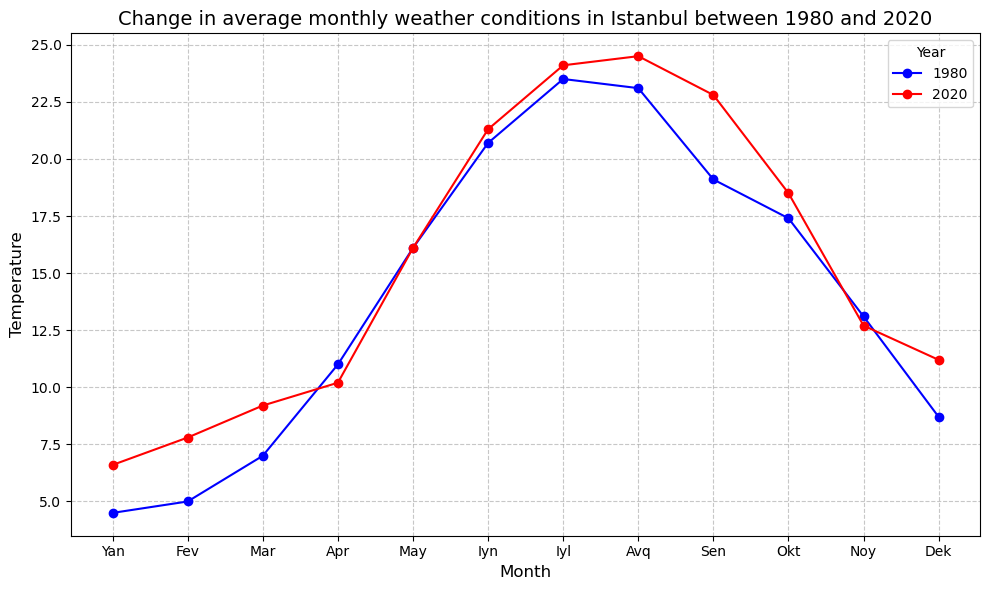

In [115]:
months = ['Yan', 'Fev', 'Mar', 'Apr', 'May', 'Iyn', 'Iyl', 'Avq', 'Sen', 'Okt', 'Noy', 'Dek']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(istanbul_1980_month['month'], istanbul_1980_month['temperature'], color='blue', label='1980', marker='o', markersize=6)
ax.plot(istanbul_2020_month['month'], istanbul_2020_month['temperature'], color='red', label='2020', marker='o', markersize=6)

ax.set_xticks(istanbul_1980_month['month'])
ax.set_xticklabels(months)

plt.title('Change in average monthly weather conditions in Istanbul between 1980 and 2020', fontsize=14)
plt.ylabel('Temperature', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [83]:
continent_1980 = weather_1980[weather_1980['year'] == 1980].groupby(['continent','year'])['temperature'].median().reset_index()

In [85]:
continent_1980

,continent,year,temperature
0,Asia,1980,21.6
1,Europe,1980,10.1
2,North America,1980,14.6
3,Oceania,1980,16.5
4,South America,1980,17.9


In [87]:
continent_2020 = weather_2020[weather_2020['year'] == 2020].groupby(['continent','year'])['temperature'].median().reset_index()

In [89]:
continent_2020

,continent,year,temperature
0,Asia,2020,22.5
1,Europe,2020,11.8
2,North America,2020,15.9
3,Oceania,2020,16.5
4,South America,2020,17.7


In [91]:
country_1980 = weather_1980[weather_1980['year'] == 1980]

In [93]:
country_2020 = weather_2020[weather_2020['year'] == 2020]

In [95]:
different = pd.concat([country_1980, country_2020], ignore_index=True)

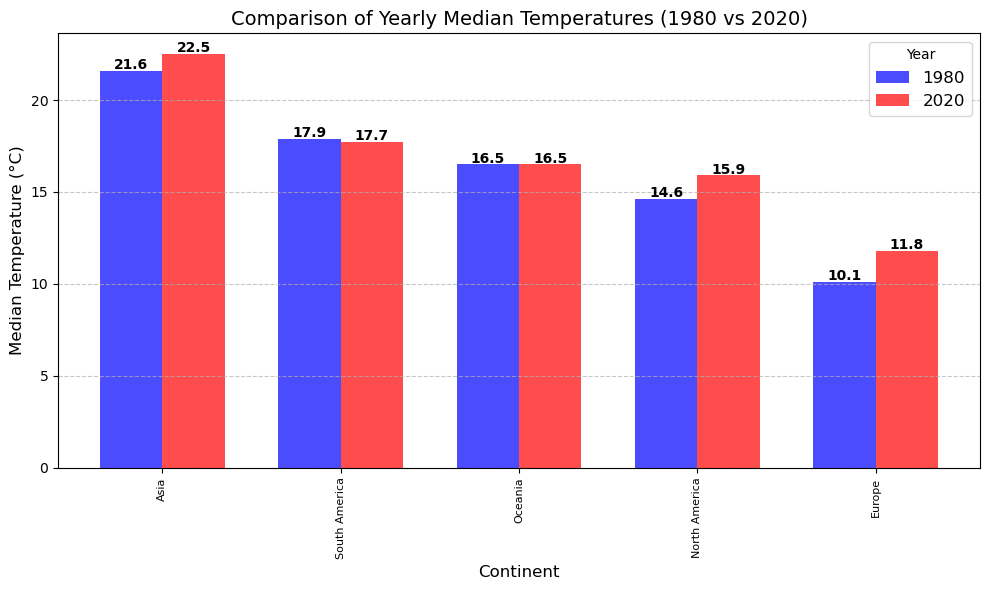

In [113]:
different_yearly_average = different[different['year'].isin([1980, 2020])].groupby(['continent', 'year'])['temperature'].median().unstack()
different_yearly_average = different_yearly_average.sort_values(by=2020, ascending=False)

continent = different_yearly_average.index

continent_1980 = different_yearly_average[1980]
continent_2020 = different_yearly_average[2020]

x = np.arange(len(continent))
width = 0.35
plt.figure(figsize=(10, 6))

plt.bar(x - width/2, continent_1980, width, label='1980', color='blue', alpha=0.7)
plt.bar(x + width/2, continent_2020, width, label='2020', color='red', alpha=0.7)

for i, v in enumerate(continent_1980):
    plt.text(i - width/2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

for i, v in enumerate(continent_2020):
    plt.text(i + width/2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(x, continent, rotation=90, fontsize=8)
plt.title('Comparison of Yearly Median Temperatures (1980 vs 2020)', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Median Temperature (°C)', fontsize=12)    
plt.legend(title='Year', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

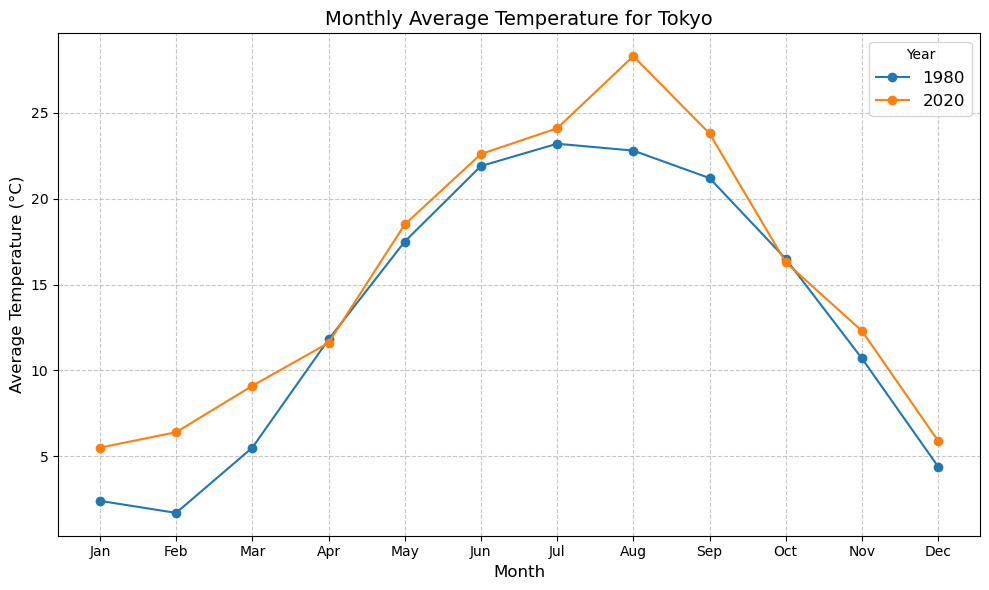

In [136]:
# You can replace the city variable with the city name and look at the monthly temperature difference for any city in the data.
city = 'Tokyo'
# Instead of the year variable, you can write any year between 1980-2020 and see the monthly temperature difference for any city in the data.
years = [1980, 2020]

filter = different[(different['city'] == city) & (different['year'].isin(years))]
asia_monthly_average = filter.groupby(['month', 'year'])['temperature'].mean().reset_index().round(1)
pivot = asia_monthly_average.pivot(index='month', columns='year', values='temperature')

plt.figure(figsize=(10, 6))
for year in years:
    plt.plot(pivot.index, pivot[year], marker='o', linestyle='-', label=str(year))

plt.title(f'Monthly Average Temperature for {city}', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(pivot.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.legend(title='Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Conclusion

In this analysis, we can see the impact of global warming on almost all countries. The average temperature has increased by an average of 1.5 - 2 degrees Celsius over the past 40 years. Of course, there are some exceptions. In North America, the average temperature has slowed down a little. In Oceania, the annual average has remained the same (the use of the term Oceania is more common in cultural and geographical divisions and is considered together with Australia). Overall, the annual average temperature has increased.